In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load image

In [75]:
def read_file(filename):
    img = cv2.imread(filename)
    img =cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    # plt.axes('off')
    plt.show()
    return img

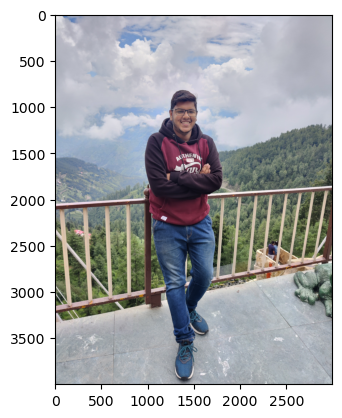

In [76]:
filename="/Users/MayankGarg/Desktop/cartoonify image/my image 3.jpg"
img = read_file(filename)
orf_img=np.copy(img)


# Create Edge mask -> to increase the edges

In [77]:
def edge_mask(img , line_size,blur_value):
    """ 
    input : Input image

    output : Edges of Image
    """
    gray = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)

    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,line_size,blur_value)
    return edges
# return matrix form representing edges




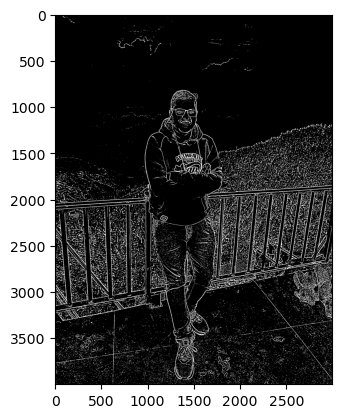

In [83]:
line_size,blur_value = 11,5

edges = edge_mask(img , line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()


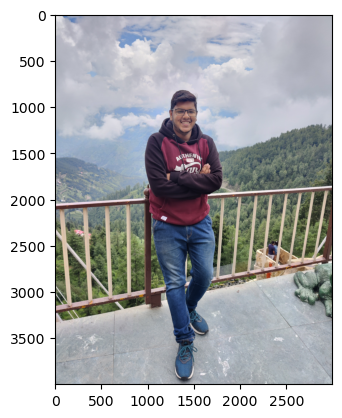

In [84]:
plt.imshow(img)
plt.show()

# Reduce the color palat


In [85]:
def color_quantization(img , k):
    # transform the image
    data = np.float32(img).reshape((-1,3))

    #determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 20, 0.001)

    #implementing K-Means
    ret , label , center = cv2.kmeans(data,k,None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS)
    center =np.uint8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)

    return result

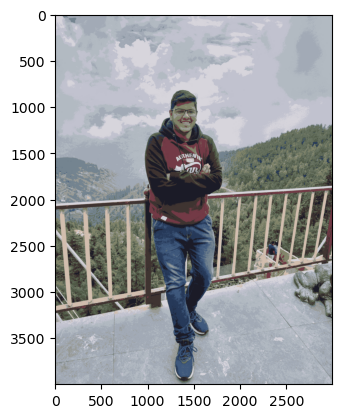

In [86]:



img = color_quantization(img,15)

plt.imshow(img)
plt.show()

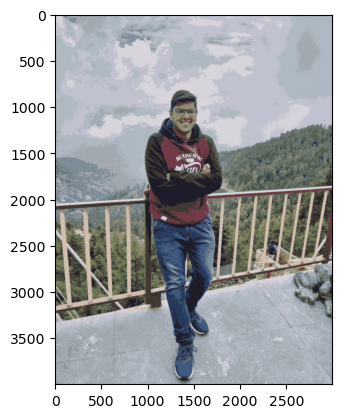

In [72]:
# reduce the noise
blurred = cv2.bilateralFilter(img, 7 ,sigmaColor = 200,sigmaSpace = 200)

plt.imshow(blurred)
plt.show()



# combine edge mask with quantized img


In [73]:
def vectorize():
    c = cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.show()
    plt.imshow(orf_img)
    plt.show()


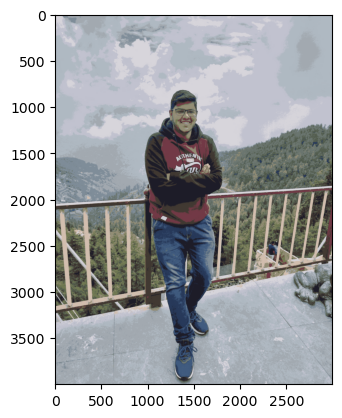

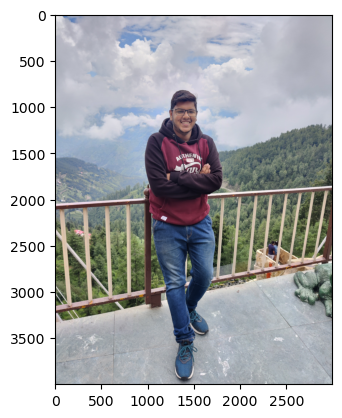

In [74]:
vectorize()